In [1]:
import joblib
import numpy as np
import os
import jax
from pathlib import Path
import mujoco

from traj_opt_helper import TrajectoryOptimizer
from algorithm import create_algorithm
from task import create_task

xla_flags = os.environ.get("XLA_FLAGS", "")
xla_flags += " --xla_gpu_triton_gemm_any=True"
xla_flags += " --xla_gpu_deterministic_ops=true"

os.environ["XLA_FLAGS"] = xla_flags

print(jax.devices()) 

[CudaDevice(id=0)]


/home/rooh/miniconda3/envs/benchmark/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Trajectory Optimization Benchmarks

This notebook helps you run trajectory-optimization benchmarks on a robotics problem and visualize the solution.


**Supported sampling-based algorithms:**
- MPPI  
- MPPI-CMA  
- Predictive Sampling  
- CMA-ES  
- Randomized Smoothing  

**Supported tasks:**

*Easy tasks*:
- Cartpole  
- Inverted Pendulum  
- Double Cartpole

*Hard tasks (contact-rich)*:
- PushT  
- Humanoid  
- Cube Rotation  


# Define you algorithm, task, and parameters

In [ ]:

algorithms = ["CMA-ES", "MPPI_CMA lr=(1.0, 0.1)", "MPPI_CMA_BD lr=(1.0, 0.1)", "MPPI", "MPPI_CMA lr=(0.1, 0.1)", "MPPI", "MPPI lr=0.1", "PredictiveSampling",  "CMA-ES", "RandomizedSmoothing lr=0.1",] # MPPI, MPPI_CMA, RandomizedSmoothing, PredictiveSampling, CMA-ES
task_name = "Humanoid" # "CartPole", "InvertedPendulum", "DoubleCartPole", "PushT", "CubeRotation", "Humanoid"

# Experimental parameters:
num_trails = 6 # 6
max_iterations = 200
num_samples = 2048 # 2048
sigma_init = 0.3 # 0.3
temperature = 0.1
horizon = 1.0 # Suggested horizon: 1.0 (for humanoid); 2.0 (for others)

# Set this to (horizon/mj_model.opt.timestep) equals to no spline interpolation
num_knots = 8 # Suggested num_knots: 200 (for easy tasks: no interpolation);  1 knot  out of 5 ctrl steps (for hard tasks)
spline = "zero" # "zero", "linear", "cubic"
run_benchmark = True # running benchmarks or not

# # Parameters
# num_trails = 1 # 6
# max_iterations = 100
# num_samples = 1024 # 2048
# sigma_init = 0.5 # 0.3
# temperature = 0.01
# horizon = 0.5 # Suggested horizon: 1.0 (for humanoid); 2.0 (for others)

# # Set this to (horizon/mj_model.opt.timestep) equals to no spline interpolation
# num_knots = 5 # Suggested num_knots: 200 (for easy tasks: no interpolation);  1 knot  out of 5 ctrl steps (for hard tasks)
# spline = "zero" # "zero", "linear", "cubic"
# run_benchmark = True # running benchmarks or not


# Load task (add your own task in task.py)

In [3]:
task, mj_model, mj_data = create_task(task_name=task_name)
# Python
if task.model.opt.disableflags & mujoco.mjtDisableBit.mjDSBL_WARMSTART:
    print("Warmstart is DISABLED")
else:
    print("Warmstart is ENABLED")

starting frame:200
Warmstart is DISABLED


(Optionally) #Time the algorithms on the task

# (Optionally) time the algorithms

In [4]:
# from profiler import time_profile, plot_results

# algorithm_names = ["MPPI", "MPPI_CMA"]
# task_names = ["CartPole", "PushT", "DoubleCartPole", "Humanoid"]

# # Profile multiple controllers
# results = []
# for algorithm_name in algorithm_names:
#     for task_name in task_names:
#         task, mj_model_profile, mj_data_profile = create_task(task_name)
#         controller = create_algorithm(name = algorithm_name,
#                                 task = task,
#                                 num_samples = num_samples,
#                                 horizon = horizon,
#                                 num_knots = num_knots,
#                                 spline = spline,
#                                 temperature = temperature,
#                                 noise = sigma_init)
#         result = time_profile(controller, mj_model_profile, mj_data_profile)
#         results.append(result)

# # Plot all results
# plot_results(results)

# Run benchmarks
* The control trajectory of the best solution will be plotted

Trajectory Optimization with 8 steps over a 1.0 second horizon.
task.dt:0.02; controller.dt:0.02; task.model.opt.timestep: 0.02; task.mj_model.opt.timestep: 0.02; simulator mj_model.opt.timestep: 0.02
Controller dt: 0.02
Simulator dt: 0.02
Jitting the controller...
Time to jit: 45.012 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/HumanoidMocap


100%|██████████| 200/200 [01:56<00:00,  1.72it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.78it/s]


Optimization done.


100%|██████████| 200/200 [01:14<00:00,  2.68it/s]


Optimization done.


100%|██████████| 200/200 [01:14<00:00,  2.67it/s]


Optimization done.


100%|██████████| 200/200 [01:15<00:00,  2.65it/s]


Optimization done.


100%|██████████| 200/200 [01:13<00:00,  2.74it/s]


Optimization done.


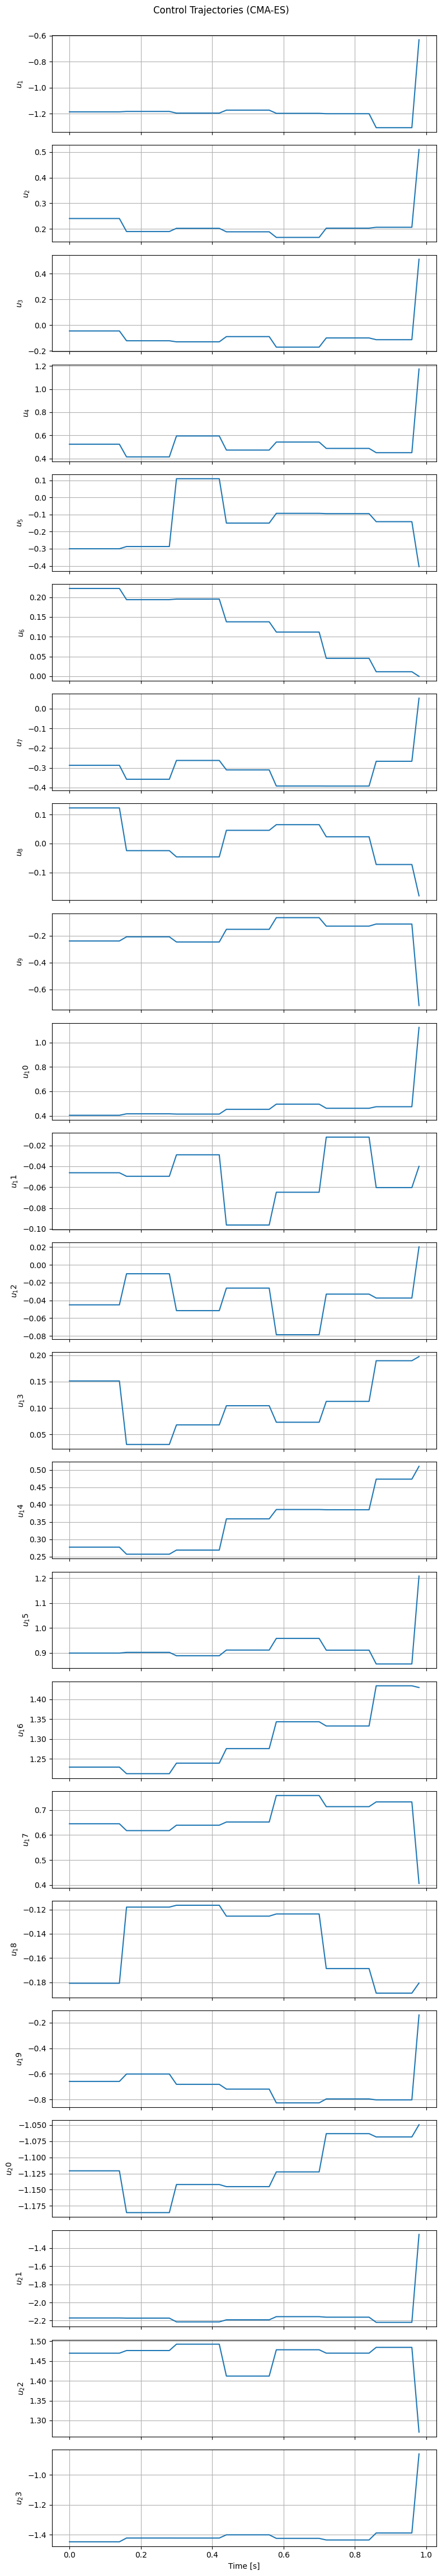

path created: /home/rooh/workspace/rs-rl/traj_opt/figures/HumanoidMocap
.npz saved
Trajectory Optimization with 8 steps over a 1.0 second horizon.
task.dt:0.02; controller.dt:0.02; task.model.opt.timestep: 0.02; task.mj_model.opt.timestep: 0.02; simulator mj_model.opt.timestep: 0.02
Controller dt: 0.02
Simulator dt: 0.02
Jitting the controller...
Time to jit: 41.131 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/HumanoidMocap


100%|██████████| 200/200 [01:44<00:00,  1.91it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.80it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.79it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.80it/s]


Optimization done.


100%|██████████| 200/200 [01:12<00:00,  2.75it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.80it/s]


Optimization done.


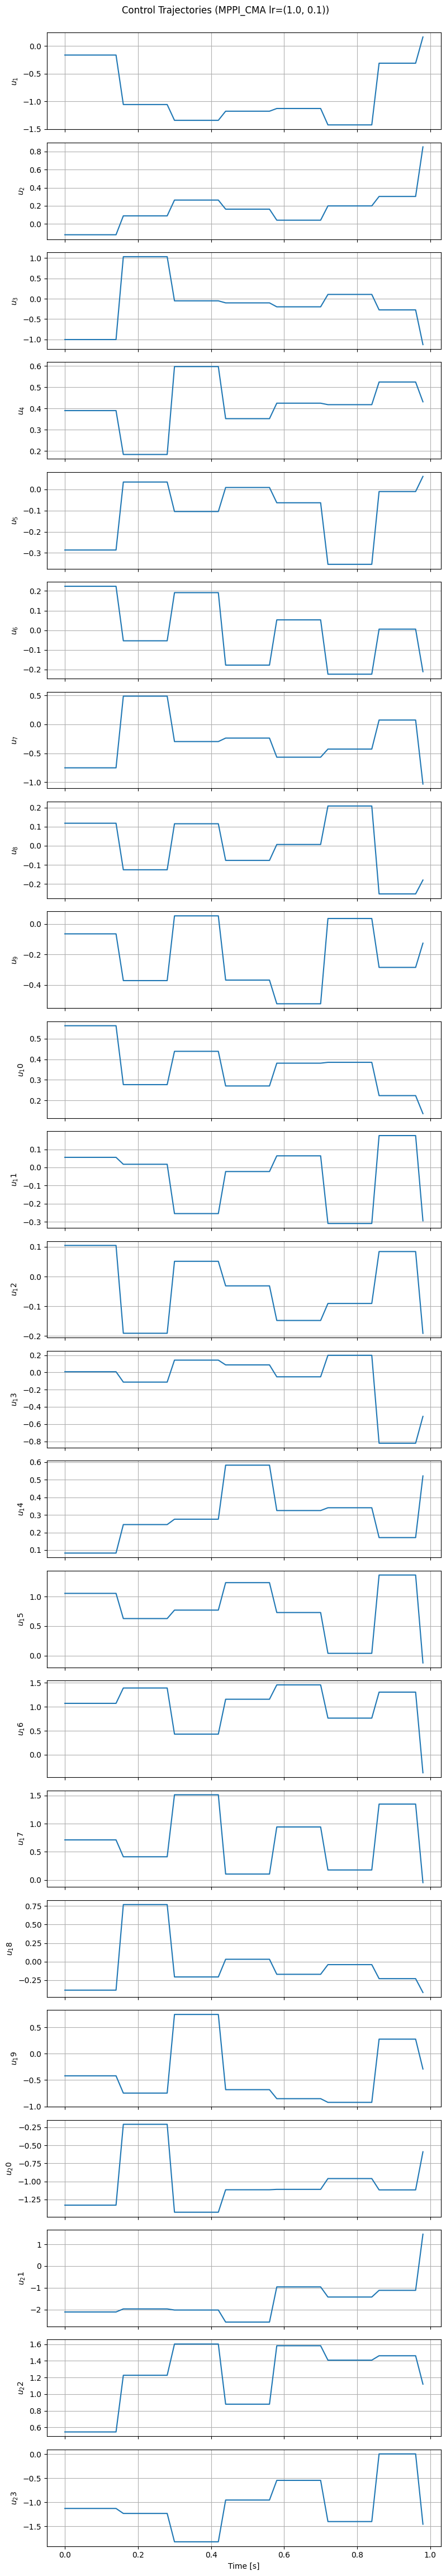

path created: /home/rooh/workspace/rs-rl/traj_opt/figures/HumanoidMocap
.npz saved
Trajectory Optimization with 8 steps over a 1.0 second horizon.
task.dt:0.02; controller.dt:0.02; task.model.opt.timestep: 0.02; task.mj_model.opt.timestep: 0.02; simulator mj_model.opt.timestep: 0.02
Controller dt: 0.02
Simulator dt: 0.02
Jitting the controller...
Time to jit: 38.374 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/HumanoidMocap


100%|██████████| 200/200 [01:49<00:00,  1.83it/s]


Optimization done.


100%|██████████| 200/200 [01:12<00:00,  2.78it/s]


Optimization done.


100%|██████████| 200/200 [01:10<00:00,  2.84it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.80it/s]


Optimization done.


100%|██████████| 200/200 [01:10<00:00,  2.84it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.79it/s]


Optimization done.


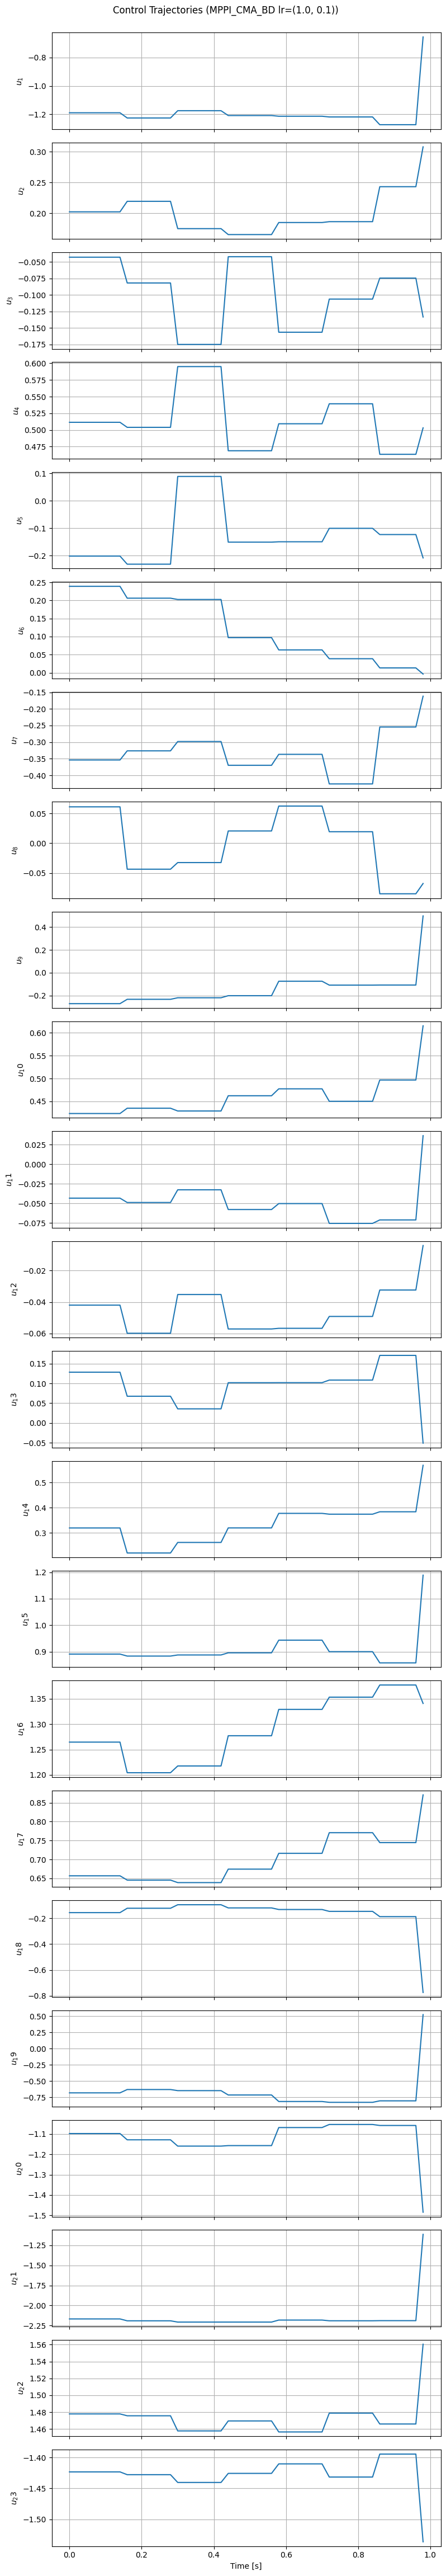

path created: /home/rooh/workspace/rs-rl/traj_opt/figures/HumanoidMocap
.npz saved
Trajectory Optimization with 8 steps over a 1.0 second horizon.
task.dt:0.02; controller.dt:0.02; task.model.opt.timestep: 0.02; task.mj_model.opt.timestep: 0.02; simulator mj_model.opt.timestep: 0.02
Controller dt: 0.02
Simulator dt: 0.02
Jitting the controller...
Time to jit: 45.763 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/HumanoidMocap


100%|██████████| 200/200 [01:47<00:00,  1.85it/s]


Optimization done.


100%|██████████| 200/200 [01:10<00:00,  2.82it/s]


Optimization done.


100%|██████████| 200/200 [01:10<00:00,  2.85it/s]


Optimization done.


100%|██████████| 200/200 [01:10<00:00,  2.82it/s]


Optimization done.


100%|██████████| 200/200 [01:10<00:00,  2.82it/s]


Optimization done.


100%|██████████| 200/200 [01:10<00:00,  2.84it/s]


Optimization done.


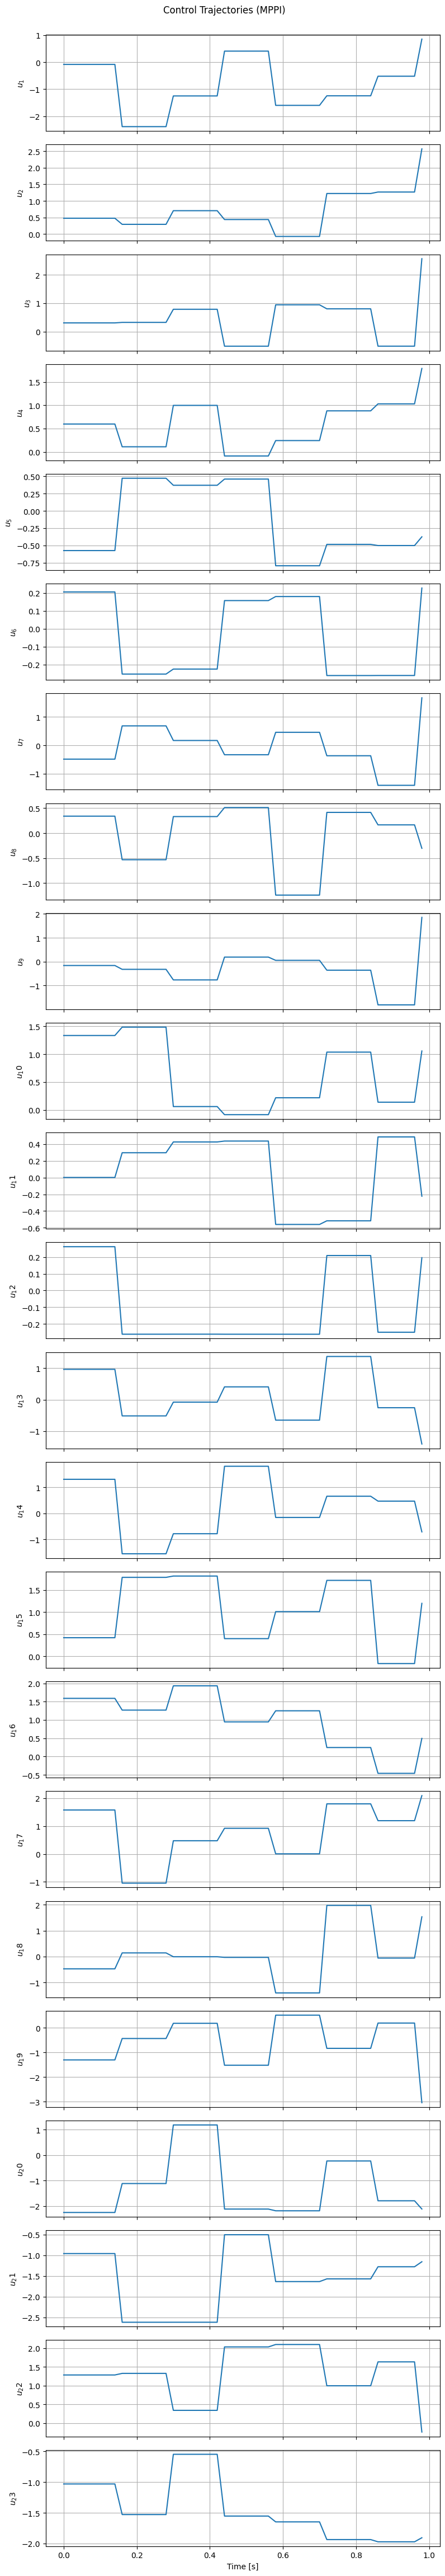

path created: /home/rooh/workspace/rs-rl/traj_opt/figures/HumanoidMocap
.npz saved
Trajectory Optimization with 8 steps over a 1.0 second horizon.
task.dt:0.02; controller.dt:0.02; task.model.opt.timestep: 0.02; task.mj_model.opt.timestep: 0.02; simulator mj_model.opt.timestep: 0.02
Controller dt: 0.02
Simulator dt: 0.02
Jitting the controller...
Time to jit: 44.938 seconds
path created: /home/rooh/workspace/rs-rl/traj_opt/data/HumanoidMocap


100%|██████████| 200/200 [01:46<00:00,  1.87it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.81it/s]


Optimization done.


100%|██████████| 200/200 [01:11<00:00,  2.81it/s]


Optimization done.


 93%|█████████▎| 186/200 [01:07<00:04,  2.85it/s]

In [ ]:
if run_benchmark == True:
    for algorithm in algorithms:

        alg = create_algorithm(name = algorithm, 
                            task = task,
                            num_samples = num_samples,
                            horizon = horizon,
                            num_knots = num_knots,
                            spline = spline,
                            temperature = temperature,
                            noise = sigma_init)

        to = TrajectoryOptimizer(algorithm, alg, mj_model, mj_data)
        to.trails(max_iteration=max_iterations, num_trails = num_trails, save_npz=True)
else:
    alg = create_algorithm(name = "visualization", 
                            task = task,
                            num_samples = num_samples,
                            horizon = horizon,
                            num_knots = num_knots,
                            spline = spline,
                            temperature = temperature,
                            noise = sigma_init)

    to = TrajectoryOptimizer("visualization", alg, mj_model, mj_data)

# Generate convergence plot

In [ ]:
from plot import visualize_optimization_results

details = visualize_optimization_results(task, algorithms)

In [ ]:
import matplotlib.pyplot as plt

print("┌──────────────────────────────────────────────┐")
print("│        Visualising results…                  │")
print("└──────────────────────────────────────────────┘")

results_dir = Path(TrajectoryOptimizer.get_path(task))
print(f"Results directory: {results_dir}")

methods = {}                                   # keep raw algorithm names

for alg in algorithms:
    f = results_dir / f"{alg}_trails_costs.pkl"
    try:
        arr = joblib.load(f)                   # shape (n_trials, n_iters)
        methods[alg] = np.asarray(arr)
    except FileNotFoundError:
        print(f"[warn] {f.name} not found; skipping.")

if not methods:
    raise RuntimeError("No cost files loaded — nothing to plot.")

iters  = np.arange(next(iter(methods.values())).shape[1])
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.figure(figsize=(10, 6))
for (name, costs), color in zip(methods.items(), colors):
    q25, med, q75 = np.quantile(costs, [0.25, 0.5, 0.75], axis=0)
    plt.plot(iters, med, lw=2, label=name, color=color)
    plt.fill_between(iters, q25, q75, color=color, alpha=0.25)

plt.title(f"{task_name.capitalize()} task — {costs.shape[1]-1} iterations, {num_trails} seeds")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.tight_layout()
plt.show()

# Visualize solutions

In [ ]:
to.visualize_rollout_gif(task, "MPPI_CMA lr=(1.0, 0.1)", fps=30, show_reference=True)

In [ ]:
to.visualize_rollout_gif(task, "MPPI", fps=30, show_reference=True)


In [ ]:
to.visualize_rollout_gif(task, "MPPI_CMA_BD lr=(1.0, 0.1)", fps=30, show_reference=True)
